In [1]:
from MakeLightcurves import *

lk version: 1.0b30


In [66]:
hostname = 'K2-57'
hostname = 'HIP 41378'
hostname = 'K2-181'
hostname = 'K2-167'
hostname = 'K2-80'

In [67]:
lc = make_lc(hostname=hostname)

Fetching TPF...


No data found for target "242961495".


Detrending...


/Users/charlotte/anaconda3/lib/python3.5/site-packages/lightkurve/search.py:133: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


AttributeError: 'NoneType' object has no attribute 'flux'

In [61]:
params = get_params(hostname)

In [62]:
print(params)

{'b': [9.977481, 2456979.93678, nan, nan, nan, 0.252, 1.83]}


Predicting transits...
Success


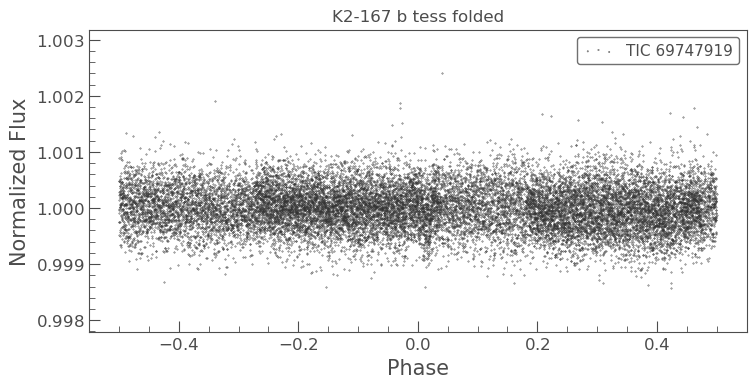

In [65]:
for p in params:
    period = params[p][0]
    t0 = params[p][1]
    transits = predict_transits(hostname,planet=p,period=period,t0=t0)
    if transits:
        title = hostname+' '+p+' tess folded'
        t1 = transits[0]
        folded = lc.fold(period=period,t0=t1-2457000)
        ax = folded.scatter(s=0.1)
        plt.title(title)
        plt.show()
    else:
        print('No transits for planet',p)